 <h1 align="center" style="color:#4ca8ed">Інтелектульний аналіз даних.<br>Группа: БС-81<br>Мумінов А.O.<br><br>Тема: 3.Кластеризація методом КРАБ.</h1>

### Завдання
1. Реалізувати алгоритм та застосувати його до даних з КП2. РОзділення кластерів проводити  по найдовшому ребру.
2. Вивести таблицю з кроками об'єднання (див. приклад). 
3. Оцінити якість кластеризації за критерієм F. Вивести значення всіх чотирьох характеристик.
4. Зробити висновок.

In [3]:
import pandas as pd
import numpy as np
import random as rn
import PrData as pr

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [4]:
data = pd.read_csv('dmd.csv') #pk,age,carrier
del data['Unnamed: 0']
data = data[['age','pk','carrier']]
data

,age,pk,carrier
0,27,10.798828,0
1,31,11.798828,0
2,22,15.000000,0
3,25,15.000000,0
4,26,7.000000,0
...,...,...,...
204,32,NaN,1
205,30,NaN,1
206,36,NaN,1
207,31,NaN,1


In [5]:
pr.FillGapsNum(data,'pk',3,0,'pkF')
pr.DnormalMM(data,'age','nage')
pr.DnormalMM(data,'pkF','npkF')
data = data[['nage','npkF','carrier']]
data

,nage,npkF,carrier
0,0.170732,0.074618,0
1,0.268293,0.083946,0
2,0.048780,0.113808,0
3,0.121951,0.113808,0
4,0.146341,0.039181,0
...,...,...,...
204,0.292683,0.116595,1
205,0.243902,0.116595,1
206,0.390244,0.116595,1
207,0.268293,0.116595,1


 <h1 align="center" style="color:#4ca8ed">1. Реалізувати алгоритм та застосувати його до даних з КП2. Розділення кластерів проводити по найдовшому ребру.</h1>

In [6]:
def krab(dt,col, k = 2, name = 'k-means', metric = pr.metric_Euclid, p = 2):
    data = dt[col]
    data = [[data.loc[i].values,i] for i in range(len(data)) ]
    sequence = [rn.choice(data)]
    list_edge = []
    del data[sequence[0][1]]
    for i in range(len(dt)-1):
        if (metric.__name__ != 'metric_Sedate'):
            distans = [metric(sequence[i][0],j[0]) for j in data] 
        else:
            distans = [metric(sequence[i][0],j[0],p) for j in data]
        index = distans.index(min(distans))
        sequence.append(data[index])
        list_edge.append(min(distans))
    
        del data[index]

    max_edge = []
    for i in range(k-1):
        index = list_edge.index(max(list_edge))
        max_edge.append(index)
        list_edge[index] = -1
    
    clusters = []
    edge_ind = np.sort([max_edge[i] for i in range(k-1)] + [len(sequence)])
    for i in range(k):
        clusters.append(sequence[0:edge_ind[i]+1])
        del sequence[0:edge_ind[i]+1]
        edge_ind -= edge_ind[i]+1
    return [pd.DataFrame([clusters[i][j][0] for j in range(len(clusters[i]))],columns=col) for i in range(k)]


In [7]:
cl3 = krab(data,['nage','npkF','carrier'],3)
print("Три кластера")
for i in cl3:
    print("Claster:\n" + str(len(i)))
    print(i.head(10))

Три кластера
Claster:
74
       nage      npkF  carrier
0  0.536585  0.078353      1.0
1  0.560976  0.086752      1.0
2  0.536585  0.118472      1.0
3  0.512195  0.147368      1.0
4  0.487805  0.154838      1.0
5  0.463415  0.149226      1.0
6  0.463415  0.172547      1.0
7  0.439024  0.149226      1.0
8  0.414634  0.191204      1.0
9  0.365854  0.179106      1.0
Claster:
134
       nage      npkF  carrier
0  0.463415  0.133375      0.0
1  0.439024  0.101673      0.0
2  0.463415  0.088610      0.0
3  0.463415  0.079282      0.0
4  0.463415  0.069953      0.0
5  0.463415  0.067166      0.0
6  0.463415  0.067166      0.0
7  0.463415  0.044774      0.0
8  0.463415  0.028914      0.0
9  0.439024  0.056890      0.0
Claster:
1
       nage  npkF  carrier
0  0.268293   1.0      1.0


In [6]:
cl4 = krab(data,['nage','npkF','carrier'],4)
print("Три кластера")
for i in cl4:
    print("Claster:\n" + str(len(i)))
    print(i.head(10))

Три кластера
Claster:
134
       nage      npkF  carrier
0  0.292683  0.116595      0.0
1  0.292683  0.109143      0.0
2  0.317073  0.114737      0.0
3  0.317073  0.101673      0.0
4  0.317073  0.087681      0.0
5  0.317073  0.080211      0.0
6  0.317073  0.069953      0.0
7  0.317073  0.060625      0.0
8  0.317073  0.038243      0.0
9  0.341463  0.042907      0.0
Claster:
54
       nage      npkF  carrier
0  0.243902  0.131517      1.0
1  0.243902  0.116595      1.0
2  0.243902  0.094203      1.0
3  0.243902  0.092345      1.0
4  0.219512  0.104479      1.0
5  0.219512  0.123136      1.0
6  0.219512  0.124047      1.0
7  0.243902  0.158554      1.0
8  0.268293  0.161360      1.0
9  0.268293  0.116595      1.0
Claster:
20
       nage      npkF  carrier
0  0.487805  0.116595      1.0
1  0.536585  0.118472      1.0
2  0.560976  0.086752      1.0
3  0.536585  0.078353      1.0
4  0.463415  0.069024      1.0
5  0.609756  0.108196      1.0
6  0.682927  0.106338      1.0
7  0.780488  0.12871

In [12]:
cl5 = krab(data,['nage','npkF','carrier'],5)
print("Три кластера")
for i in cl5:
    print("Claster:\n" + str(len(i)))
    print(i.head(10))

Три кластера
Claster:
134
       nage      npkF  carrier
0  0.292683  0.066218      0.0
1  0.292683  0.073688      0.0
2  0.292683  0.075547      0.0
3  0.292683  0.076494      0.0
4  0.268293  0.077423      0.0
5  0.268293  0.074618      0.0
6  0.268293  0.083946      0.0
7  0.268293  0.083946      0.0
8  0.268293  0.091416      0.0
9  0.268293  0.116595      0.0
Claster:
32
       nage      npkF  carrier
0  0.243902  0.131517      1.0
1  0.243902  0.116595      1.0
2  0.243902  0.094203      1.0
3  0.243902  0.092345      1.0
4  0.219512  0.104479      1.0
5  0.219512  0.123136      1.0
6  0.219512  0.124047      1.0
7  0.243902  0.158554      1.0
8  0.268293  0.161360      1.0
9  0.268293  0.116595      1.0
Claster:
22
       nage      npkF  carrier
0  0.365854  0.175353      1.0
1  0.365854  0.179106      1.0
2  0.414634  0.191204      1.0
3  0.439024  0.149226      1.0
4  0.463415  0.149226      1.0
5  0.463415  0.172547      1.0
6  0.487805  0.154838      1.0
7  0.512195  0.14736

 <h1 align="center" style="color:#4ca8ed">2. Вивести таблицю з кроками об'єднання.</h1>
 <h1 align="center" style="color:#4ca8ed">3. Оцінити якість кластеризації за критерієм F. Вивести значення всіх чотирьох характеристик.</h1>

In [25]:
def krab_show(dt,col, k = 2, name = 'k-means', metric = pr.metric_Euclid, p = 2):
    data = dt[col]
    data = [[data.loc[i].values,i] for i in range(len(data)) ]
    sequence = [rn.choice(data)]
    sequence = [data[1]]#############################################
    table = pd.DataFrame({ "точки"  :[[sequence[0][1],0]],
                           "ребро"  :[0]})
    del data[sequence[0][1]]
    for i in range(len(dt)-1):
        if (metric.__name__ != 'metric_Sedate'):
            distans = [metric(sequence[i][0],j[0]) for j in data] 
        else:
            distans = [metric(sequence[i][0],j[0],p) for j in data]
        index = distans.index(min(distans))
        sequence.append(data[index])
        table.iloc[i,0][1] = data[index][1]
        table.iloc[i,1] = min(distans)
        table.loc[i+1] = [[data[index][1],0],0]
        del data[index]

    print(table.head(20))
    max_edge = []
    print('\n\nрозбиття за максимальними ребрами')
    for i in range(k-1):
        index = table[table['ребро'] == max(table.iloc[:,1])]
        max_edge.append(index)
        table.iloc[max_edge[i].index[0],1] = -1
        print(max_edge[i])
    edge_ind = [i.index[0] for i in max_edge]
    edge_ind = np.sort([edge_ind[i] for i in range(k-1)] + [len(sequence)])
    clusters = []
    
    print('\n\nРозподіл по кластерам')
    clust = pd.DataFrame(columns= ['кластер'] )
    x = 0
    for i in range(len(sequence)):
            if(i > edge_ind[x]):
                x+= 1
            clust.loc[sequence[i][1]] = x
    print(clust)
    for i in range(k):
        clusters.append(sequence[0:edge_ind[i]+1])
        del sequence[0:edge_ind[i]+1]
        edge_ind -= edge_ind[i]+1
        
    print('\n\nХарактеристики кластеризації')
    pi = [0]
    for i in range(len(table)):
        if(table.iloc[i,1] == -1):
            if(len(clusters[len(pi)-1])-1  != 0):
                pi[len(pi)-1] == pi[len(pi)-1]/(len(clusters[len(pi)-1])-1)
            else:
                pi[len(pi)-1] == 0
            pi.append(0)
            continue
        pi[len(pi)-1] += table.iloc[i,1]
    p = np.mean(sum(pi))
    d = np.mean([max_edge[i].iloc[0][1] for i in range(k-1)])
    for i in range(k-1):
        table['ребро'].iloc[max_edge[i].index[0]] = max_edge[i].iloc[0,1]
    lam = sum([min(table['ребро'][max_edge[i].index[0]-1],table['ребро'][max_edge[i].index[0]+1])
            /(max_edge[i].iloc[0,1]) for i in range(k-1)])/(k-1)
    h = (k**k)*(np.prod([len(clusters[i])/len(dt) for i in range(k)]))
    print("\nМіра близості об'єктів в середині кластера:")
    print(pi)
    print("\nЗагальна міра близості:")
    print(p)
    print("\nВідстань між кластерами:")
    print(d)
    print("\nЗагальна міра неоднорідності:")
    print(lam)
    print("\nРівномірність розподілу точек:")
    print(h)
    print("\nЗагальна критерій якості:")
    print(np.log((d*h)/(lam*p)))
    return [pd.DataFrame([clusters[i][j][0] for j in range(len(clusters[i]))],columns=col) for i in range(k)]

In [29]:
clusters = krab_show(data,['nage','npkF','carrier'],3)
print("Три кластера")
for i in clusters:
    print("Claster:\n" + str(len(i)))
    print(i.head(10))
    print(i.tail(10))

         точки     ребро
0      [1, 66]  0.000000
1     [66, 20]  0.006523
2     [20, 50]  0.002806
3    [50, 165]  0.016798
4    [165, 85]  0.025179
5     [85, 37]  0.002806
6     [37, 99]  0.011169
7     [99, 28]  0.025027
8     [28, 35]  0.019586
9     [35, 42]  0.007452
10   [42, 187]  0.025023
11   [187, 30]  0.013063
12    [30, 40]  0.013993
13   [40, 157]  0.007470
14   [157, 64]  0.010258
15    [64, 81]  0.009328
16   [81, 152]  0.022383
17   [152, 62]  0.024832
18   [62, 149]  0.013054
19  [149, 171]  0.042907


розбиття за максимальними ребрами
          точки    ребро
133  [116, 178]  1.00023
          точки     ребро
206  [126, 162]  0.889956


Розподіл по кластерам
    кластер
1         0
66        0
20        0
50        0
165       0
..      ...
92        1
95        1
126       1
162       2
68        2

[209 rows x 1 columns]


Характеристики кластеризації

Міра близості об'єктів в середині кластера:
[2.749669214733915, 4.280053053206918, 0.3460093311838865]

Загальна 

 <h1 align="center" style="color:#4ca8ed">4. Зробити висновок.</h1>

Висновок: Кількість об'єктів в кластерах. Форма кластерів довільна, у по типу ленти на відмінну від гіперсфери при роботі k-means. Також суттєва проблема це часте розбиття на кластери з наявною одною точкую (якщо точка сильно віддалена від інших, велика вирогідність что вона буде мати з обох боків найдовші ребра).
Також слід замітити що алгоритм був реалізован з розбиттям по найдовшому ребру, що є не найєффективнішою реалізацією данного алгоритму.

 <h1 align="center" style="color:#4ca8ed">5. Додаток.</h1>

In [10]:
def visualization2D_clusters(data):
    z = 0
    i = 1
    while(z < (len(data[0].iloc[0])-1)):
        fig = plt.figure(figsize=(10,5), dpi=120)
        ax = fig.add_axes([0,0,1,1])
        ax.set_xlabel(data[0].columns[i], fontsize=25)
        ax.set_ylabel(data[0].columns[z], fontsize=25)
        for j in range(len(data)):
            ax.scatter([data[j].iloc[x,i] for x in range(len(data[j]))],
                       [data[j].iloc[x,z] for x in range(len(data[j]))],
                       label=j,lw = 1)
        ax.legend()
        if (i == (len(data[0].iloc[0])-1)):
            z += 1
            i = z
        i+=1
        
def visualization3D_clusters(data,col = [0,1,2]):
    fig = plt.figure(figsize=(12,8), dpi=120)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel(data[0].columns[col[0]])
    ax.set_ylabel(data[0].columns[col[1]])
    ax.set_zlabel(data[0].columns[col[2]])
    for i in range(len(data)):
        ax.plot([data[i].iloc[x,col[0]] for x in range(len(data[i]))],
                   [data[i].iloc[x,col[1]] for x in range(len(data[i]))],
                   [data[i].iloc[x,col[2]] for x in range(len(data[i]))])
    plt.show()

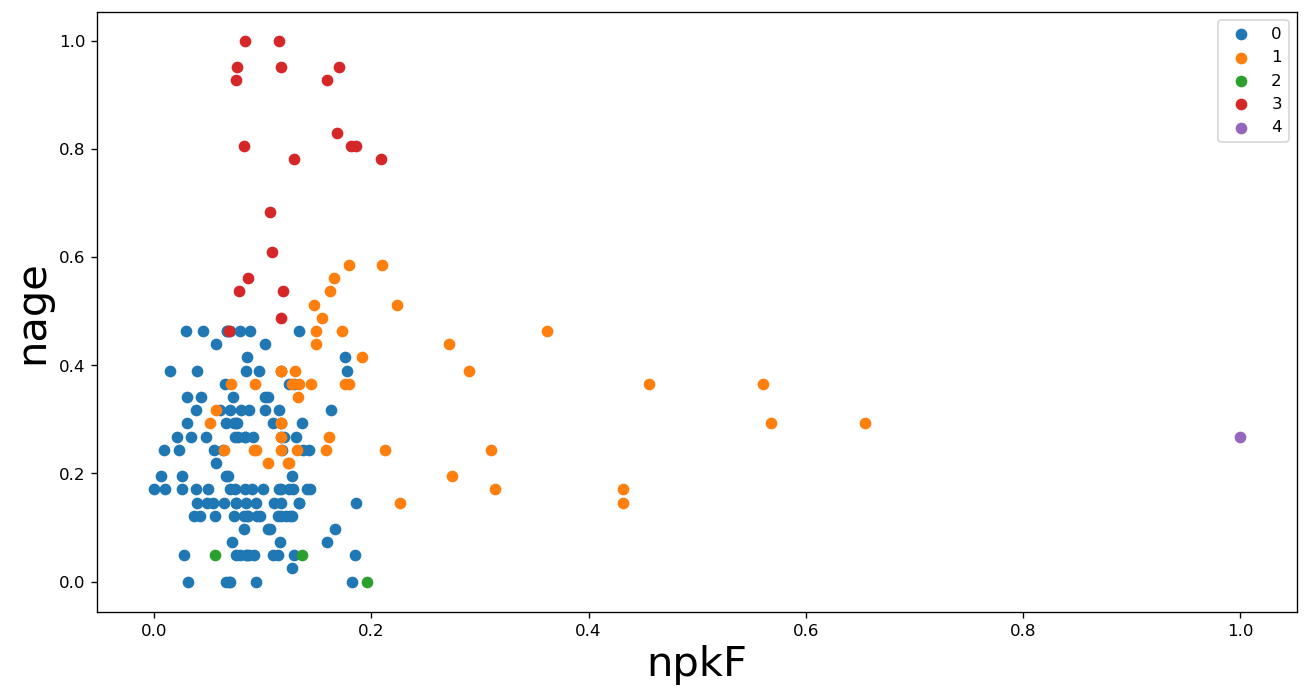

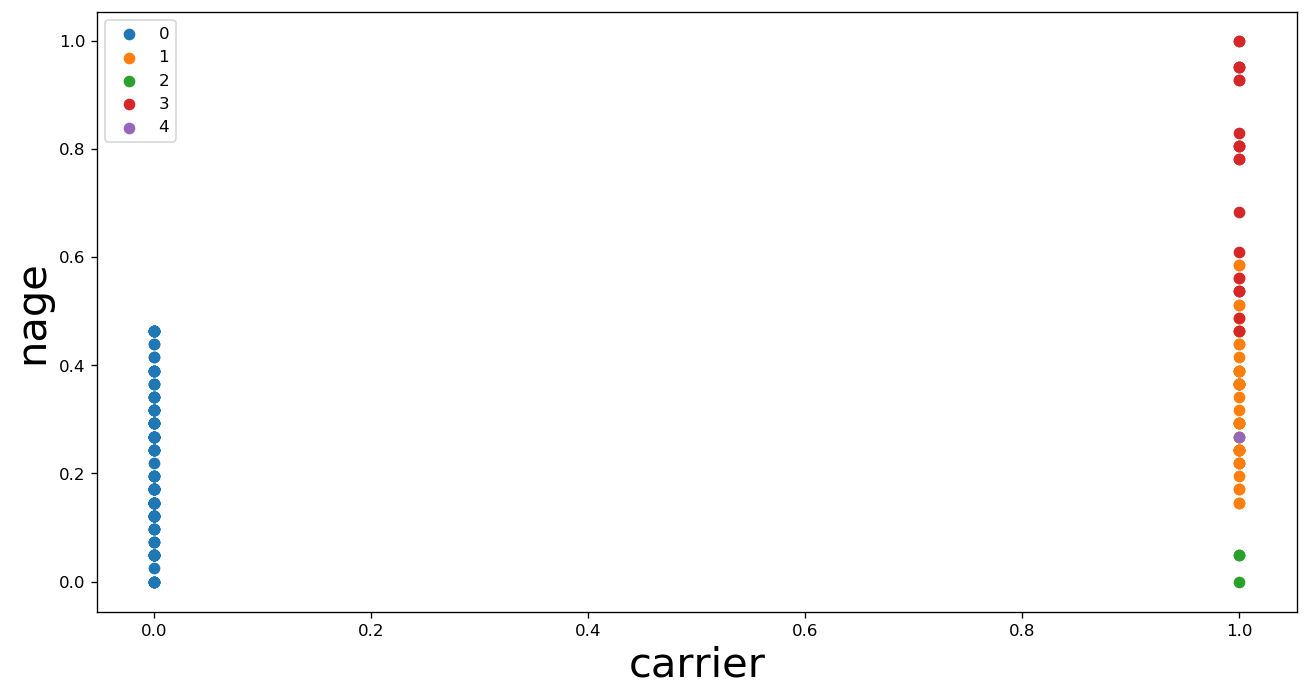

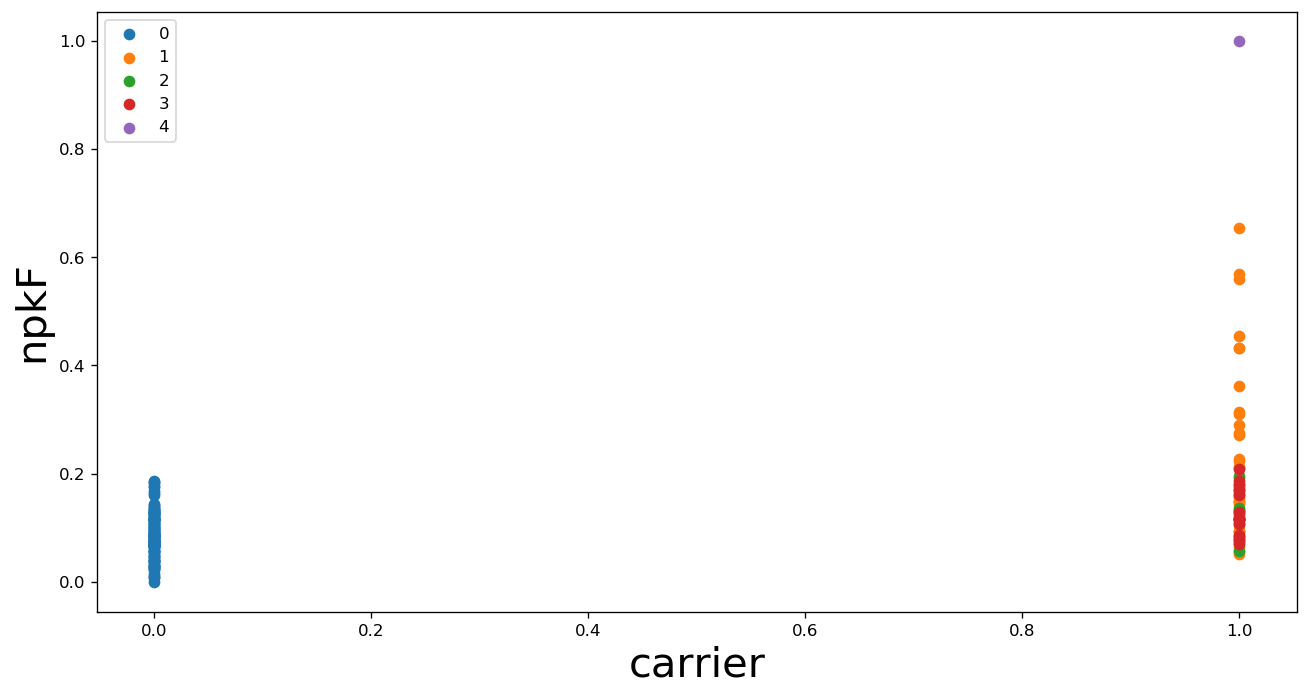

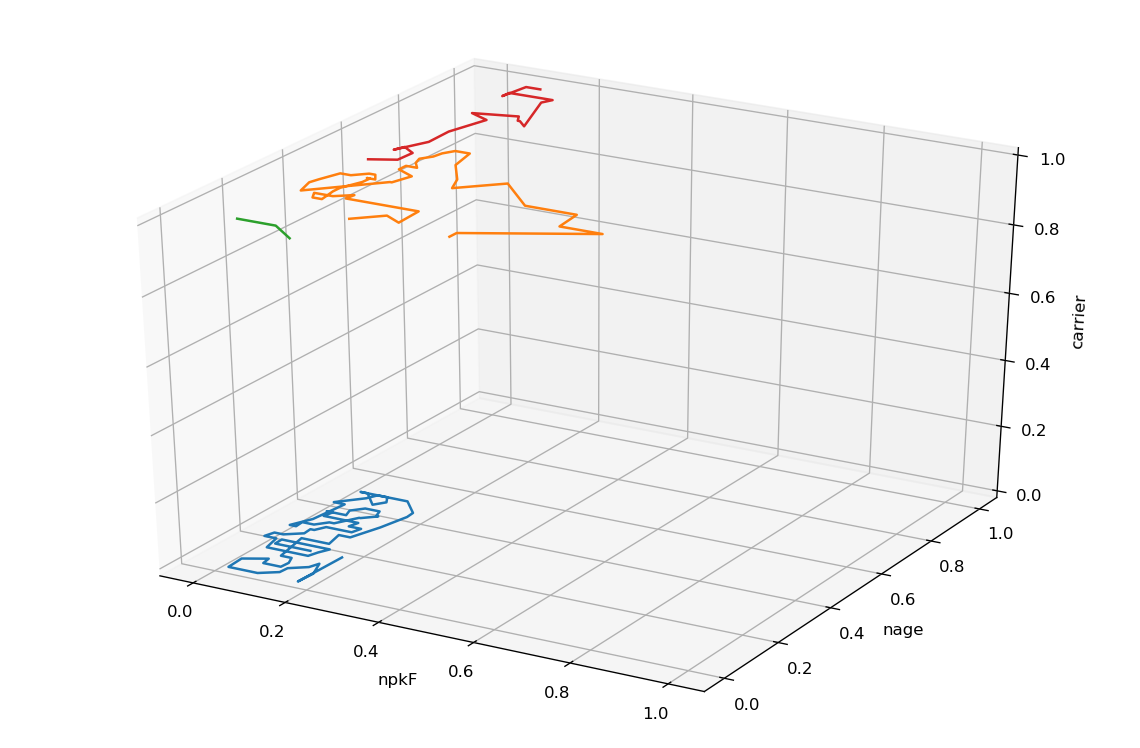

In [11]:
visualization2D_clusters(clusters)
visualization3D_clusters(clusters, col = [1,0,2])